In [66]:
from rdkit import Chem, DataStructs
from utils.common_utils import get_mol,show_mols,mol_with_atom_index
from rdkit.Chem import AllChem,Draw,rdFMCS
from IPython.display import display
import pandas as pd
import openpyxl
from openpyxl.drawing.image import Image 
from openpyxl.drawing.spreadsheet_drawing import AnchorMarker
from pathlib import Path
import os,sys

# smi="CC(C1=C(C2=CN3C(C(C)=C2)=NC=N3)NC4=CC=C(C5CCN(C(CCO)CCO)CC5)C=C14)C"
# mol=get_mol(smi)
# mol=mol_with_atom_index(mol, start=0)
# png,svg=show_mols([mol])
# display(svg)
# bs=[]
# bd_atoms=[]
# for bond in mol.GetBonds():
#     idx = bond.GetIdx()
#     if bond.IsInRing():
#         continue
#     btype = bond.GetBondType()
#     if btype == Chem.BondType.SINGLE:
#         bs.append(idx)
#         bd_atoms.append([bond.GetBeginAtom().GetIdx(), bond.GetEndAtom().GetIdx()])
# print(f'bs=  {bs}')
# print(f'bd_atoms=  {bd_atoms}')
LETTERS = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
smi='COC1=CC(C2=CC3=C(C=C2Cl)[NH]C=C3C(=O)O)=C(Cl)C=C1C1CCC(N(C)C2=NC=NC3=C2C=C[NH]3)CC1'
csv_dict={'a':[1,3,4],'SMILES':['C','CC','CCC'],'smi':[smi,'CC',smi]}
df=pd.DataFrame.from_dict(csv_dict)

# mol = Chem.MolFromSmiles('COC1=CC(C2=CC3=C(C=C2Cl)[NH]C=C3C(=O)O)=C(Cl)C=C1C1CCC(N(C)C2=NC=NC3=C2C=C[NH]3)CC1')
print(df)
def csvToExcel(df, imgCols=['SMILES','smi'],save_file=''):
    wb = openpyxl.Workbook()
    ws = wb.create_sheet('Sheet')
    tmpImgPath=Path('./images_png')
    tmpImgPath.mkdir(exist_ok=True, parents=True)
    col_names=df.columns.to_list()
    for idx,row in df.iterrows():
        irow=idx+1
        for icol,vcol in enumerate(col_names):
            if vcol in imgCols:
                col_letter=LETTERS[icol]
                ws.row_dimensions[irow].height = 180
                ws.column_dimensions[col_letter].width = 60
                mol = Chem.MolFromSmiles(row[vcol])
                img = Draw.MolToImage(mol, size=[400, 200])
                img.save(tmpImgPath.joinpath(f'molecule{irow}{icol}.png'))
                img=Image(tmpImgPath.joinpath(f'molecule{irow}{icol}.png'))
                img.width = 400
                img.height = 200
                print(ws.cell(row=irow, column=icol).coordinate)
                # img.anchor = ws.cell(row=irow, column=icol).coordinate # col and row are zero-based
                # ws.add_image(img, f"{col_letter}{irow}")
                ws.add_image(img)
            ws.cell(irow,icol+1).value=row[vcol]  ## add value to the folders
    wb.save(save_file)
    wb.close()
    os.system(f"rm -rf {tmpImgPath}")
    return wb
# wb=csvToExcel(df, save_file='Results/test.xls')







   a SMILES                                                smi
0  1      C  COC1=CC(C2=CC3=C(C=C2Cl)[NH]C=C3C(=O)O)=C(Cl)C...
1  3     CC                                                 CC
2  4    CCC  COC1=CC(C2=CC3=C(C=C2Cl)[NH]C=C3C(=O)O)=C(Cl)C...
A1


TypeError: can only concatenate str (not "list") to str

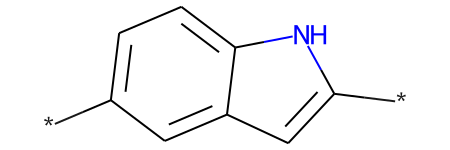

0
1
['ClearProp', 'DescribeQuery', 'GetAtomMapNum', 'GetAtomicNum', 'GetBonds', 'GetBoolProp', 'GetChiralTag', 'GetDegree', 'GetDoubleProp', 'GetExplicitBitVectProp', 'GetExplicitValence', 'GetFormalCharge', 'GetHybridization', 'GetIdx', 'GetImplicitValence', 'GetIntProp', 'GetIsAromatic', 'GetIsotope', 'GetMass', 'GetMonomerInfo', 'GetNeighbors', 'GetNoImplicit', 'GetNumExplicitHs', 'GetNumImplicitHs', 'GetNumRadicalElectrons', 'GetOwningMol', 'GetPDBResidueInfo', 'GetProp', 'GetPropNames', 'GetPropsAsDict', 'GetSmarts', 'GetSymbol', 'GetTotalDegree', 'GetTotalNumHs', 'GetTotalValence', 'GetUnsignedProp', 'HasOwningMol', 'HasProp', 'HasQuery', 'InvertChirality', 'IsInRing', 'IsInRingSize', 'Match', 'NeedsUpdatePropertyCache', 'SetAtomMapNum', 'SetAtomicNum', 'SetBoolProp', 'SetChiralTag', 'SetDoubleProp', 'SetExplicitBitVectProp', 'SetFormalCharge', 'SetHybridization', 'SetIntProp', 'SetIsAromatic', 'SetIsotope', 'SetMonomerInfo', 'SetNoImplicit', 'SetNumExplicitHs', 'SetNumRadicalEle

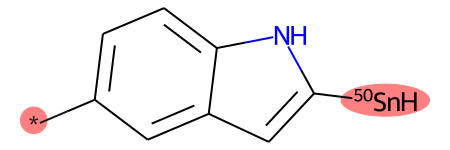

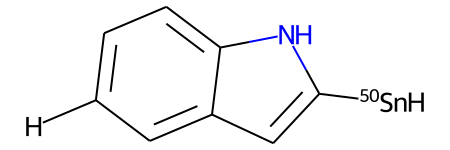

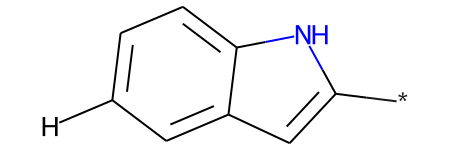

In [69]:
import glob
from pathlib import Path
import re
from utils.sarm_utils import fragmentize,create_SARM,connect2Frags,get_dummy_negb
from rdkit import Chem, DataStructs
from utils.common_utils import get_mol,show_mols,mol_with_atom_index
from rdkit.Chem import AllChem,Draw,rdFMCS

workFolder="Sele78_Feb13/seleIdx20TLR820/Scaffold/Combine_Table/"
act_csv_file="/public/home/zhangjie/Project_support/AIXB-5/Selectivity_Jan16/JAN28/seleIdx20TLR820.csv"  ## all the 

r_mol=Chem.MolFromSmiles("*c1ccc2[nH]c(*)cc2c1")
display(r_mol)
match = r_mol.GetSubstructMatches(Chem.MolFromSmarts('[#0]'))
leftDummy=match[0][0]
rightDummy=match[1][0]

core_mol_atoms=r_mol.GetAtoms()
# r_mol=Chem.EditableMol(r_mol)

core_mol_atoms[leftDummy].SetIsotope(0)
core_mol_atoms[rightDummy].SetIsotope(1)
dummy_pair=[]
dummy_negb=[]
for imatch in match:     ### look through all the dummy atoms
    atm_idx=imatch[0]
    isotope=core_mol_atoms[atm_idx].GetIsotope()
    print(isotope)
    if isotope in [2, 0]:
        dummy_pair.append(atm_idx)
        dummy_negb.append(get_dummy_negb(core_mol_atoms[atm_idx]))
    else:
        print(dir(core_mol_atoms[atm_idx]))
        # Chem.ClearProp(core_mol_atoms[atm_idx])
        # Chem.AssignStereochemistry(r_mol.GetMol(),force=True,cleanIt=True)
        core_mol_atoms[atm_idx].SetIsotope(50)
        core_mol_atoms[atm_idx].SetAtomicNum(50)
        # core_mol_atoms[atm_idx].SetSymbol('Sn')
        print(f"core_mol_atoms[atm_idx]: {core_mol_atoms[atm_idx].DescribeQuery()}")#.GetAtomicNum()
        # print(f"core_mol_atoms[atm_idx]: {core_mol_atoms[atm_idx].GetSymbol()}")
        # core_mol_atoms[atm_idx].SetIsotope(50)
        # Chem.SanitizeMol(r_mol.GetMol())
# r_mol = r_mol.GetMol()
display(r_mol)
products = Chem.ReplaceSubstructs(r_mol,Chem.MolFromSmarts('[#0]'),Chem.MolFromSmarts('[#1]'),replaceAll=True)
combo=products[0]
display(combo)
products = Chem.ReplaceSubstructs(combo,Chem.MolFromSmarts('[#50]'),Chem.MolFromSmarts('[#0]'),replaceAll=True)
combo=products[0]
display(combo)
# r_mol=Core.MolFromSmiles(R)
# r_mol=set_isotope(r_mol, 2)
# combo = Chem.CombineMols(core_mol, r_mol)

In [36]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem,Draw
from rdkit.Chem import MCS
import pandas as pd
import numpy as np
import copy,re
from rdkit.Chem.Scaffolds.MurckoScaffold import GetScaffoldForMol,MakeScaffoldGeneric,MurckoScaffoldSmiles,MurckoScaffoldSmilesFromSmiles
# from my_toolset.my_utils import get_mol,compute_FP,canonic_smiles,mapper
from utils.common_utils import mapper,csvToExcel,get_mol,compute_FP,canonic_smiles,float_row,heavy_atm_smiles,kekulize_smi,mol_with_atom_index
from utils.sarm_utils import get_core
import os,sys
from IPython.display import display, SVG, display_svg
import seaborn as sns
from matplotlib import pyplot
from pathlib import Path

def get_single_frag(smi, smarts):
    ''' single dummy atom "[cH]1c(c2cc(cccc3)c3[nH]2)[cH]n4n[cH]nc4[*;!#1]1" '''
    re_p=re.compile(r'\[(\*((?!nH).)*?)\]') 
    re_p_other=re.compile(r'\[((?!\*).)*?\]') 
    smarts_readable = re.sub(re_p, '[1*]', smarts)  
    smarts_readable = re.sub(re_p_other, '*', smarts_readable) 
    # print(f"smarts_readable={smarts_readable}")
    smarts_mol=Chem.MolFromSmiles(smarts_readable)
    smarts_mol=mol_with_atom_index(smarts_mol, start=0)
    # display(smarts_mol)
    smart_mol_atoms=smarts_mol.GetAtoms()
    smart_dummies=smarts_mol.GetSubstructMatches(Chem.MolFromSmarts('[#0]'))
    # print(smart_dummies)
    for idummy in smart_dummies:
        isotope=smart_mol_atoms[idummy[0]].GetIsotope()
        # print(f"isotope= {isotope}")
        if isotope==1:
            dummy_index=idummy[0]
    # print(Chem.MolToSmiles(smarts_mol))
    ###  molecule match section
    mol=get_mol(smi)
    mol=mol_with_atom_index(mol, start=0)
    mol_atoms=mol.GetAtoms()
    # display(mol)
    mol_match=mol.GetSubstructMatches(Chem.MolFromSmarts(smarts))[0]
    # print(f"mol_match={mol_match}")
    dummyIdx_mol=mol_match[dummy_index]
    idummy_neighs=mol_atoms[dummyIdx_mol].GetNeighbors()
    idummy_neighs=[iatom.GetIdx() for iatom in idummy_neighs]
    # print(f"idummy_neighs={idummy_neighs}")
    for idummy_neighb in idummy_neighs:
        if idummy_neighb not in mol_match:
            R_atom=idummy_neighb   ## the atom in R group bonded to the core
    bond=mol.GetBondBetweenAtoms(int(dummyIdx_mol),int(R_atom)).GetIdx()
    Frag_mol = Chem.FragmentOnBonds(mol, [bond], dummyLabels=[(0, 0)])
    Frag_mols=Chem.GetMolFrags(Frag_mol, asMols=True)
    Frag_smis=[Chem.MolToSmiles(imol) for imol in Frag_mols]
    R_smi=''
    for ifrag in Frag_smis:
        imatched=mol.GetSubstructMatches(Chem.MolFromSmarts(smarts))
        # print("imatched=",imatched)
        if len(imatched)>0:
            R_smi=ifrag
    return R_smi
    
smi_test="O=C(N)CN1CCC(C2=CC3=C(NC(C4=CN5C(C(C)=C4C)=NC=N5)=C3C(C)C)C=C2)CC1"
smart_test="c1c(c2cc(cccc3)c3[nH]2)cn4ncnc4[*;!#1]1"
get_single_frag(smi_test, smart_test)

'*C'

In [3]:
''' Just simply search for a single fragments 
such as N(CC1)CCC1c2nc3cc[nH]c3cc2
'''
from rdkit import Chem, DataStructs
import pandas as pd
import numpy as np
from rdkit.Chem.Scaffolds.MurckoScaffold import GetScaffoldForMol,MakeScaffoldGeneric,MurckoScaffoldSmiles,MurckoScaffoldSmilesFromSmiles
from utils.common_utils import mapper,csvToExcel,get_mol,float_row,sort_mol_sim_df
from utils.sarm_utils import fragmize_on_bonds, get_complete_frag, get_core
from rdkit import Chem, DataStructs

df=pd.read_csv("/public/home/zhangjie/Projects/REINVENT-master/data/ChEMBL_filtered.csv")
smarts=["O=C(O)c1c[nH]c2ccccc12"]
matched_smis=[]
for ismi in df["SMILES"].to_list():
    imol=Chem.MolFromSmiles(ismi)
    if imol==None: continue
    for ismarts in smarts:
        ismarts_mol = Chem.MolFromSmarts(ismarts)
        matched=imol.GetSubstructMatches(ismarts_mol)
        if len(matched)>0:
            matched_smis.append(ismi)
            print(ismi)

df_match=pd.DataFrame(matched_smis, columns='SMILES')
df_match.to_csv("Results/Matched_O=C(O)c1c[nH]c2ccccc12.csv")

COC(=O)c1[nH]c2c(O)cc3c(c2c1C(=O)OC)C(CCl)CN3C(=O)c1cc2cc(OC)ccc2[nH]1
COC(=O)c1[nH]c2c(O)cc(NC(=O)c3cc4cc(OC)c(OC)c(OC)c4[nH]3)c(CCCl)c2c1C(=O)OC
COC(=O)c1c[nH]c2ccc(NC(=O)CNC(=O)Nc3ccccc3)cc12
COc1ccccc1C=Cc1ncc([N+](=O)[O-])n1CCOC(=O)c1c[nH]c2ccccc12
Cc1ccccc1C=Cc1ncc([N+](=O)[O-])n1CCOC(=O)c1c[nH]c2ccccc12
CCOC(=O)c1c[nH]c2ccc([N+](=O)[O-])cc12
CCOC(=O)c1c(C)[nH]c2ccc3c(c12)CN1CCc2ccccc2C1O3
O=C(O)c1c[nH]c2ccc(S(=O)(=O)N3CCOCC3)cc12
Cc1cc(-c2ccc3c4c([nH]c3c2F)-c2ccc(C(N)=O)cc2COC4=O)ccc1F
O=C(O)c1c[nH]c2cc(NS(=O)(=O)c3ccc(Cl)cc3F)ccc12
CCC(CC1CCCN1C)OC(=O)c1c[nH]c2ccccc12
COC(=O)c1c(C)[nH]c2c(OC(=O)N3CCN(C)CC3)cc3c(c12)C(CBr)CN3C(=O)C=Cc1ccc(OC)cn1
O=C(O)c1c[nH]c2cc(NS(=O)(=O)c3cccc(Cl)c3F)ccc12
O=C(OC1CC2CC3CC(C1)N2CC3=O)c1c[nH]c2ccccc12
COC(=O)c1c[nH]c2cc(Br)ccc12
O=C(OC1CN2CCC1CC2)c1c[nH]c2ccccc12
COc1[nH]c2ccc(F)cc2c1C(=O)OCC1CCN(CCNS(C)(=O)=O)CC1
CN(Cc1ccccc1)C(=O)COC(=O)c1c[nH]c2ccccc12
CCOC(=O)c1[nH]c2ccc(C(=O)OC)cc2c1C(=O)OCC
CCOC(=O)c1c(COc2cc3c(C(=O)OCC)c(Cc4ccccc4)oc3cc2

TypeError: Index(...) must be called with a collection of some kind, 'SMILES' was passed

In [25]:
from chembl_webresource_client.new_client import new_client
from utils.common_utils import mapper,csvToExcel,get_mol,compute_FP,canonic_smiles,float_row,heavy_atm_smiles,kekulize_smi

molecule = new_client.substructure
# m1 = molecule.filter(chembl_id='CHEMBL192')

activities = new_client.activity
# res = activities.filter(molecule_chembl_id="CHEMBL192", pchembl_value__isnull=False)
# res

# substructure = new_client.substructure
# res = substructure.filter(smiles="O=C(O)c1c[nH]c2ccccc12")

res_match=[]
for idx,value in enumerate(res):
    molecule_chembl_id=value["molecule_chembl_id"]
    canonical_smiles=value["molecule_structures"]['canonical_smiles']
    print(f"molecule_chembl_id={molecule_chembl_id}")
    print(f"canonical_smiles={canonical_smiles}")
    
    target=[]
    # activities = new_client.activity
    res_act = activities.filter(molecule_chembl_id=molecule_chembl_id, pchembl_value__isnull=False)
    for iresAct in res_act:
        target.append(iresAct['target_pref_name'])
    target=list(set(target))
    res_match.append([molecule_chembl_id,canonical_smiles,str(target)])
    
resMatch_df=pd.DataFrame(res_match,columns=['molecule_chembl_id','canonical_smiles','target'])
resMatch_df.to_csv("Results/SubMatchO=C(O)c1c[nH]c2ccccc12.csv",index=None)
csvToExcel("Results/SubMatchO=C(O)c1c[nH]c2ccccc12.csv", imgCols=['canonical_smiles'],save_file="Results/SubMatchO=C(O)c1c[nH]c2ccccc12.xlsx")
    
    
    
    

*c1nc2c[nH]c3nccc-3c2n1*


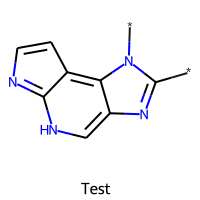

In [1]:
from IPython.display import display
from rdkit.Chem import AllChem,Draw,rdFMCS
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize
un = rdMolStandardize.Uncharger()

def add_nitrogen_charges(smiles):
    m = Chem.MolFromSmiles(smiles,sanitize=False)
    m.UpdatePropertyCache(strict=False)
    ps = Chem.DetectChemistryProblems(m)
    if not ps:
        Chem.SanitizeMol(m)
        return m
    for p in ps:
        if p.GetType()=='AtomValenceException':
            at = m.GetAtomWithIdx(p.GetAtomIdx())
            if at.GetAtomicNum()==7 and at.GetFormalCharge()==0 and at.GetExplicitValence()==4:
                at.SetFormalCharge(1)
    Chem.SanitizeMol(m)
    return m

smi="*c1nc2c[nH]c3nccc-3c2n1*"

mol=Chem.rdmolfiles.MolFromSmiles(smi,sanitize=False)
# un.uncharge(mol)
print(Chem.MolToSmiles(mol))
Draw.MolToFile(mol, "molecule.png",legend='test')
# display(mol)
img=Chem.Draw.MolsToGridImage([mol], molsPerRow=1, subImgSize=(200, 200), legends=['Test'])
display(img)

In [22]:
from my_toolset.my_utils import mapper,get_mol,compute_FP
import re,copy
def mol_with_atom_index(mol, Idx=None, start=1):
    mol=get_mol(mol)
    mol = copy.deepcopy(mol)
    for atom in mol.GetAtoms():
        if Idx != None:
            # atom.SetAtomMapNum(Idx)
            atom.SetProp("atomNote", str(Idx))
        else:
            atom.SetProp("atomNote", str(atom.GetIdx()+start))
    return mol
def get_single_frag(smi, smarts):
    print(smi,'   ',smarts)
    ''' single dummy atom and the dummy atom in not included in the R group. For example, "[cH]1c(c2cc(cccc3)c3[nH]2)[cH]n4n[cH]nc4[*;!#1]1" '''
    re_p=re.compile(r'\[(\*((?!nH).)*?)\]') 
    re_p_other=re.compile(r'\[((?!\*).)*?\]') 
    smarts_readable = re.sub(re_p, '[1*]', smarts)  
    smarts_readable = re.sub(re_p_other, '*', smarts_readable) 
    # print(f"smarts_readable={smarts_readable}")
    smarts_mol=Chem.MolFromSmiles(smarts_readable)
    smarts_mol=mol_with_atom_index(smarts_mol, start=0)
    # display(smarts_mol)
    smart_mol_atoms=smarts_mol.GetAtoms()
    smart_dummies=smarts_mol.GetSubstructMatches(Chem.MolFromSmarts('[#0]'))
    # print(smart_dummies)
    for idummy in smart_dummies:
        isotope=smart_mol_atoms[idummy[0]].GetIsotope()
        # print(f"isotope= {isotope}")
        if isotope==1:
            dummy_index=idummy[0]
    print("dummy_index=",dummy_index)
    # print(Chem.MolToSmiles(smarts_mol))
    ###  molecule match section
    mol=get_mol(smi)
    mol=mol_with_atom_index(mol, start=0)
    mol_atoms=mol.GetAtoms()
    # display(mol)
    Smarts_tmp=re.sub(re_p, '[*]', smarts) 
    print(f"Smarts_tmp={Smarts_tmp}")
    # print("Dummy",mol.GetSubstructMatches(Chem.MolFromSmarts(Smarts_tmp)))
    mol_match=mol.GetSubstructMatches(Chem.MolFromSmarts(Smarts_tmp))[0]
    print(f"mol_match={mol_match}")
    dummyIdx_mol=mol_match[dummy_index]
    idummy_neighs=mol_atoms[dummyIdx_mol].GetNeighbors()
    idummy_neighs=[iatom.GetIdx() for iatom in idummy_neighs]
    # print(f"idummy_neighs={idummy_neighs}")
    # Smarts_tmp=re.sub(re_p, '', smarts) 
    # mol_match_nodummy=mol.GetSubstructMatches(Chem.MolFromSmarts(Smarts_tmp))[0]
    # print(f"mol_match_nodummy={mol_match_nodummy}")
    for idummy_neighb in idummy_neighs:
        if idummy_neighb in mol_match:
            R_atom=idummy_neighb   ## the atom in R group bonded to the core
    print(int(dummyIdx_mol),int(R_atom))
    bond=mol.GetBondBetweenAtoms(int(dummyIdx_mol),int(R_atom)).GetIdx()
    # bond=mol.GetBondBetweenAtoms(10,11).GetIdx()
    print("bond=",bond)
    Frag_mol = Chem.FragmentOnBonds(mol, [bond], dummyLabels=[(0, 0)])
    Frag_mols=Chem.GetMolFrags(Frag_mol, asMols=True)
    Frag_smis=[Chem.MolToSmiles(imol) for imol in Frag_mols]
    R_smi=''
    for ifrag in Frag_smis:
        ifrag_mol=Chem.MolFromSmiles(ifrag)
        imatched=ifrag_mol.GetSubstructMatches(Chem.MolFromSmarts(Smarts_tmp))
        # print(f"ifrag={ifrag}")
        # print("imatched=",imatched)
        # print(f"len(imatched)={len(imatched)}")
        if len(imatched)==0:
            R_smi=ifrag
    return R_smi

get_single_frag("CN(C)C(=O)CCc1ccc(-c2nc3cnc4[nH]ccc4c3n2C2CCCCC2)o1", "[*;C,c,n,N,F,Cl,Br]c1nc(cnc2[nH]ccc23)c3[n]1")

CN(C)C(=O)CCc1ccc(-c2nc3cnc4[nH]ccc4c3n2C2CCCCC2)o1     [*;C,c,n,N,F,Cl,Br]c1nc(cnc2[nH]ccc23)c3[n]1
dummy_index= 0
Smarts_tmp=[*]c1nc(cnc2[nH]ccc23)c3[n]1
mol_match=(10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22)
10 11
bond= 10


'*c1ccc(CCC(=O)N(C)C)o1'

13
25


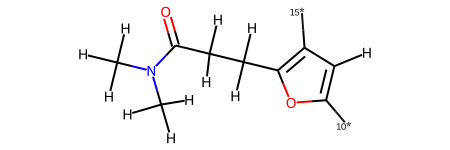

'[10*]c1cc(CCC(=O)N(C)C)oc1[10*]'

In [36]:
from my_toolset.my_utils import mapper,get_mol,compute_FP
from rdkit.Chem import AllChem
mol1=get_mol('[10*]c1ccc(CCC(=O)N(C)C)o1')
print(len(mol1.GetAtoms()))
mol1 = Chem.AddHs(mol1)
print(len(mol1.GetAtoms()))
# mol2=Chem.MolFromSmiles("[12*]")
# combo = Chem.CombineMols(mol1, mol2)
# edcombo = Chem.EditableMol(combo)
Atoms=mol1.GetAtoms()
Atoms[14].SetAtomicNum(0)
Atoms[14].SetIsotope(15)
display(mol1)
def add_dummyRgroup(ringSmi, RPos):
    mol=get_mol(ringSmi)
    mol = Chem.AddHs(mol)
    Atoms=mol.GetAtoms()
    for ipos,count in enumerate(RPos):
        count=int(count)
        if count>0:
            neighbors = Atoms[ipos].GetNeighbors()
            for ineighb in neighbors:
                idxNeighb=ineighb.GetIdx()
                itypeNeighb=ineighb.GetAtomicNum()
                if itypeNeighb==1:
                    Atoms[idxNeighb].SetAtomicNum(0)
                    Atoms[idxNeighb].SetIsotope(count)
    mol = Chem.RemoveHs(mol)
    return Chem.MolToSmiles(mol)
add_dummyRgroup('[10*]c1ccc(CCC(=O)N(C)C)o1', [0,0,10])

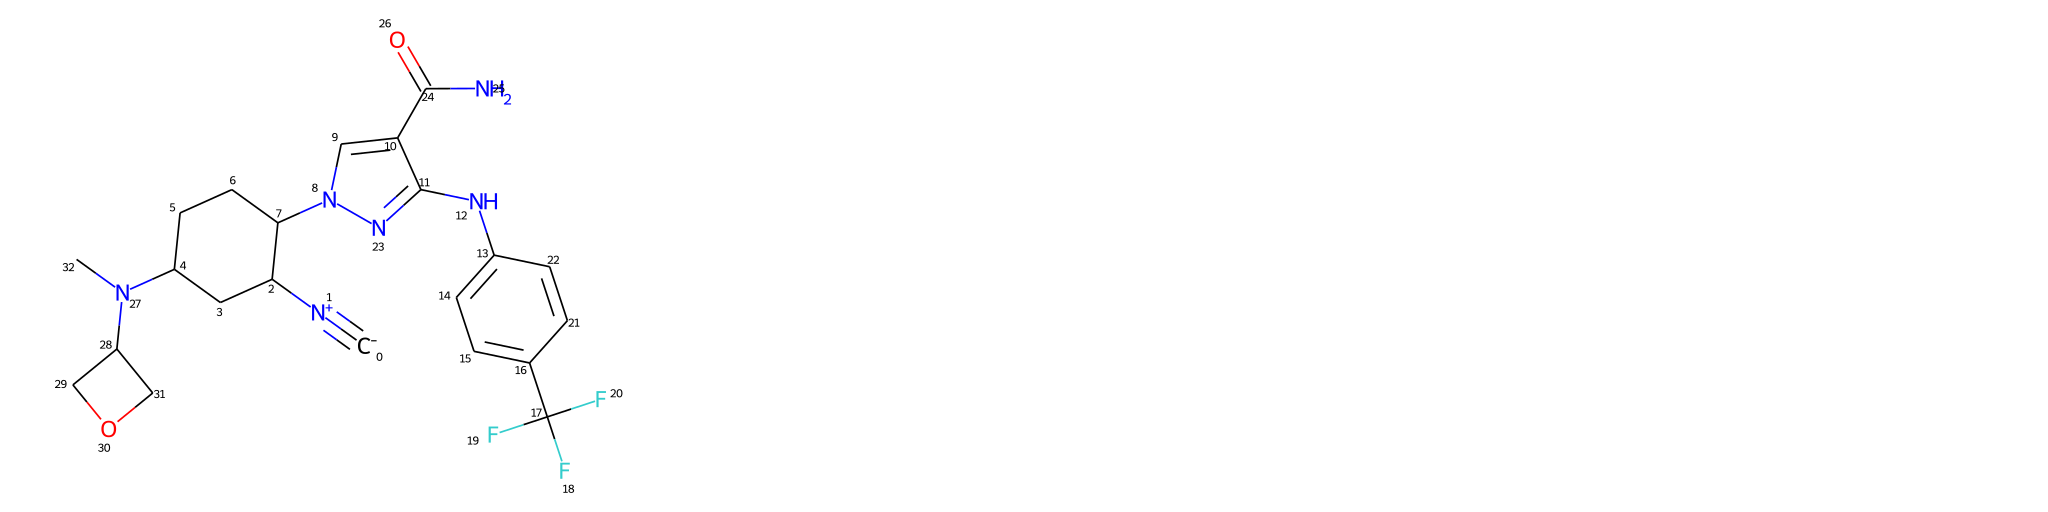

atomOutRings: [1]
atomOutRings: []
atomOutRings: [27]
atomOutRings: []
atomOutRings: []
atomOutRings: [8]
system1=[2, 3, 4, 5, 6, 7]
system2=[2, 3, 4, 5, 6, 7, 1, 27, 8]
atomOutRings: [7]
atomOutRings: []
atomOutRings: [24]
atomOutRings: [12]
atomOutRings: []
system1=[8, 9, 10, 11, 23]
system2=[8, 9, 10, 11, 23, 7, 24, 12]
atomOutRings: [12]
atomOutRings: []
atomOutRings: []
atomOutRings: [17]
atomOutRings: []
atomOutRings: []
system1=[13, 14, 15, 16, 21, 22]
system2=[13, 14, 15, 16, 21, 22, 12, 17]
atomOutRings: [27]
atomOutRings: []
atomOutRings: []
atomOutRings: []
system1=[28, 29, 30, 31]
system2=[28, 29, 30, 31, 27]


['C1CCCCC1', 'C1=CNN=C1', 'C1=CC=CC=C1', 'C1COC1']

In [73]:
from my_toolset.drawing_utils import show_mols
def GetRingSystems(smi, includeSpiro=False):
    try:
    # if 1:
        mol = Chem.MolFromSmiles(smi)
        Chem.Kekulize(mol)
        molAtoms=mol.GetAtoms()
        ri = mol.GetRingInfo()
        systems = []
        for ring in ri.AtomRings():
            ringAts = set(ring)
            nSystems = []
            for system in systems:
                nInCommon = len(ringAts.intersection(system))
                if nInCommon and (includeSpiro or nInCommon > 1):
                    ringAts = ringAts.union(system)
                else:
                    nSystems.append(system)
            nSystems.append(ringAts)
            systems = nSystems
        ring_smis = []
        systems=[list(isystem) for isystem in systems]
        for system in systems:
            tempMol=copy.deepcopy(mol)
            # tempMol = Chem.RemoveHs(tempMol)
            molAtoms=tempMol.GetAtoms()
            for iatm in system:
                ''' Append atoms connect to the ring with double bond '''
                ineighbs = molAtoms[iatm].GetNeighbors()
                ineighbs = [iatm.GetIdx() for iatm in ineighbs]
                atomOutRings=set(ineighbs).difference(set(system))
                for iatomOutRing in atomOutRings:
                    bond = mol.GetBondBetweenAtoms(iatomOutRing, iatm)
                    if bond.GetBondType() == Chem.BondType.DOUBLE:
                        system.append(iatomOutRing)
            # add dummy R
            system_with_dummy=[]
            for iringAtom in system:
                # print(f"iringAtom={iringAtom}")
                atomNeighb=molAtoms[iringAtom].GetNeighbors()
                atomNeighb=[iNeighb.GetIdx() for iNeighb in atomNeighb]
                atomOutRings=set(atomNeighb).difference(set(system))
                atomOutRings=list(atomOutRings)
                print("atomOutRings:",atomOutRings)
                if len(atomOutRings)>0:
                    molAtoms[atomOutRings[0]].SetAtomicNum(0)
                    molAtoms[atomOutRings[0]].SetFormalCharge(0)
                    molAtoms[atomOutRings[0]].SetNumExplicitHs(0)
                    system_with_dummy.append(atomOutRings[0])
            print(f"system1={system}")    
            system=system+system_with_dummy
            print(f"system2={system}")    
            frag_smi = Chem.MolFragmentToSmiles(tempMol, system, canonical=True,isomericSmiles=False,kekuleSmiles=True) ##
            ring_smis.append(frag_smi)
        ring_smis=list(set(ring_smis))
        re_p1=re.compile(r'\[(\*((?!nH).)*?)\]') 
        re_p2=re.compile(r'\((\*((?!nH).)*?)\)') 
        re_p3=re.compile(r'\*') 
        re_p4=re.compile(r'\(\)') 
        for re_p in [re_p1,re_p2,re_p3,re_p4]:
            ring_smis=[re.sub(re_p, '', iringSmi) for iringSmi in ring_smis]
        return ring_smis
    except:
        return []

smi="[C-]#[N+]C1CC(CCC1N2C=C(C(NC3=CC=C(C(F)(F)F)C=C3)=N2)C(N)=O)N(C4COC4)C"
mol=get_mol(smi)
mol=mol_with_atom_index(mol,start=0)
png,svg=show_mols([mol])
display(svg)
GetRingSystems(smi)

In [50]:
from rdkit import Chem
from rdkit.Chem import AllChem
def correct_nitrogenDegree(smi):
    imol=Chem.rdmolfiles.MolFromSmiles(smi,sanitize=False)
    for iatom in imol.GetAtoms():

        if iatom.GetAtomicNum()==7 and iatom.GetDegree()!=3:
            print(iatom.GetDegree())
            iatom.SetFormalCharge(1)
    imol.UpdatePropertyCache()
    smi=Chem.MolToSmiles(imol)
    return smi
smi="c1(c[nH]c2c3ccn2)c3ncn1"
imol=Chem.rdmolfiles.MolFromSmiles("*c1nc2cnc3[nH]ccc3c2n1*")  #c1nc2c[nH]c3nccc-3c2n1
# imol.UpdatePropertyCache()
mol = Chem.rdmolfiles.MolFromSmarts("c1nc2cnc3nccc3c2n1")  #c1nc2cnc3[nH]ccc3c2n1
imol.GetSubstructMatches(mol)






# imol=Chem.MolFromSmiles("*c1nc2cnc3[nH]ccc3c2n1*")
# imol = Chem.RWMol(imol)

# display(imol)
# # for iatom in imol.GetAtoms():
# #     if iatom.GetAtomicNum()==0:
# #         dummyNeighb=iatom.GetNeighbors()
# matched=imol.GetSubstructMatches(Chem.MolFromSmarts("[#7][#0]"))
# atoms=imol.GetAtoms()
# for imatch in matched:
#     atoms[imatch[1]].SetAtomicNum(1)
# # imol.UpdatePropertyCache()
# Chem.SanitizeMol(imol)
# imol=Chem.RemoveHs(imol)
# # Chem.Kekulize(imol)
# display(imol)
# Chem.MolToSmiles(imol)

((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),)

In [13]:
from rdkit import Chem
from rdkit.Chem import AllChem
from my_toolset.my_utils import canonic_smiles
import re
import pandas as pd
from pandarallel import pandarallel
from functools import partial
pandarallel.initialize(nb_workers=30)

smi="c1(ncc2c3[nH]cn2)c3cc[nH]1"
canoSmi=canonic_smiles(smi)
print("canoSmi=",canoSmi)

def replace_nH(ismarts):
    ismarts=ismarts.replace('[nH]','n')
    ismarts=ismarts.replace('-','')
    return ismarts

def remove_dummy(smi):
    FragMol=Chem.MolFromSmiles(smi)
    matched=FragMol.GetSubstructMatches(Chem.MolFromSmarts("[#7][#0]"))
    atoms=FragMol.GetAtoms()
    for imatch in matched:
        atoms[imatch[1]].SetAtomicNum(1)
    # imol.UpdatePropertyCache()
    Chem.SanitizeMol(FragMol)
    FragMol=Chem.RemoveHs(FragMol)
    smi=Chem.MolToSmiles(FragMol)
    re_p=re.compile(r'\(\*\)|\*|\[\*\]|\-')
    ifrag_nodummy = re.sub(re_p, '', smi)  ## remove dummy atoms
    return ifrag_nodummy

def match_frag(ismi,ismarts):
    # print("ismi",ismi)
    # print("ismarts",ismarts)
    mol = Chem.MolFromSmiles(ismi)
    ismarts=replace_nH(ismarts)
    smartsMol = Chem.MolFromSmarts(ismarts) #,sanitize=False
    matched=mol.GetSubstructMatches(smartsMol)
    if len(matched)>0:
        # print(matched)
        return 1
    else:
        return 0

df_act=pd.read_csv("/public/home/zhangjie/Projects/autosarm/JAK1JAK2_Selectivity/Data/JAK_All_Mar22_PK.csv")
smi_dummy=remove_dummy(canoSmi)
print("smi_dummy=",smi_dummy)
match_frag_p=partial(match_frag,ismarts=smi_dummy)
df_act['matched']=df_act.parallel_apply(lambda x: match_frag_p(x['SMILES']),axis=1)#   ['SMILES'].apply_parallel(match_frag_p)
df_act=df_act[df_act['matched']==1]
df_act

INFO: Pandarallel will run on 30 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
canoSmi= CCn1ccc2c3[nH]cnc3cnc21
smi_dummy= CCn1ccc2c3[nH]cnc3cnc21


,SMILES,JAK1,JAK2,JAK3,TYK2,JAK1_PK,JAK2_PK,JAK1ToJAK2,matched
4155,CCN(C(=O)c1cc2c3c(ncn3C)c(=NC)[nH]c2n1C[C@H](O...,NaN,43,NaN,NaN,NaN,7.37,NaN,1
4156,CCN(C(=O)c1cc2c3c(ncn3C)c(NC)nc2n1C[C@H](O)CO)...,NaN,43,711,NaN,NaN,7.37,NaN,1
4238,CCn1[nH]c(=Nc2nc3c(cc(C(=O)N(C4CC4)C4CC4)n3CC)...,330.0,1.5,NaN,220,6.48,8.82,0.00,1
4241,CCn1c(C(=O)N(C2CC2)C2CC2)cc2c3c(ncn3C)c(N=C(O)...,1700.0,580,NaN,1700,5.77,6.24,0.34,1
4242,CCn1c(C(=O)N(C2CC2)C2CC2)cc2c3c(ncn3C)c(N=c3cc...,16.0,1.2,NaN,1.9,7.80,8.92,0.07,1
4243,CCn1c(C(=O)N(C2CC2)C2CC2)cc2c3c(ncn3C)c(N=c3cc...,75.0,80,NaN,66,7.12,7.10,1.07,1
4244,CCn1c(C(=O)N(C2CC2)C2CC2)cc2c3c(ncn3C)c(N=c3nc...,6000.0,33,NaN,NaN,5.22,7.48,0.01,1
4245,CCn1c(C(=O)N(C2CC2)C2CC2)cc2c3c(ncn3C)c(NC(=O)...,220.0,210,538,290,6.66,6.68,0.95,1
4246,CCn1c(C(=O)N(C2CC2)C2CC2)cc2c3c(ncn3C)c(NC(=O)...,1700.0,25,NaN,1700,5.77,7.60,0.01,1
4247,CCn1c(C(=O)N(C2CC2)C2CC2)cc2c3c(ncn3C)c(NC(O)=...,220.0,210,NaN,290,6.66,6.68,0.95,1


In [46]:

from rdkit.Chem.Draw import MolDraw2DCairo
import rdkit
from collections import defaultdict

def show_mols_cairo(ismi,legend,special):
    mol = Chem.MolFromSmiles(ismi)
    drawer = MolDraw2DCairo(400, 400)
    drawer.drawOptions().legendFontSize = 160
    drawer.drawOptions().useBWAtomPalette()
    rdkit.Chem.Draw.DrawingOptions().selectColor=(1,0,0)
    if special:
        colors = [(0.9019607843137255, 0.6235294117647059, 0.0), 
          (0.33725490196078434, 0.7058823529411765, 0.9137254901960784),
         (0.0, 0.6196078431372549, 0.45098039215686275)]
        highlightatoms = defaultdict(list)
        highlightbonds = defaultdict(list)
        atomrads = {}
        for iatom in mol.GetAtoms():
            iatomIdx=iatom.GetIdx()
            highlightatoms[iatomIdx].append(colors[1])
            atomrads[iatomIdx] = 1
        
        drawer.DrawMoleculeWithHighlights(mol,legend,dict(highlightatoms),dict(highlightbonds),atomrads,{}) #,dict(highlightatoms),dict(highlightbonds)
        drawer.FinishDrawing()
        img = drawer.GetDrawingText()
    # with open('mol.png', 'wb') as f:
    #     f.write(img)
    return img

jpg=show_mols_cairo(ismi="CCCCCC",legend='', special=1)
with open("test.jpg", 'wb') as f:
    f.write(jpg)

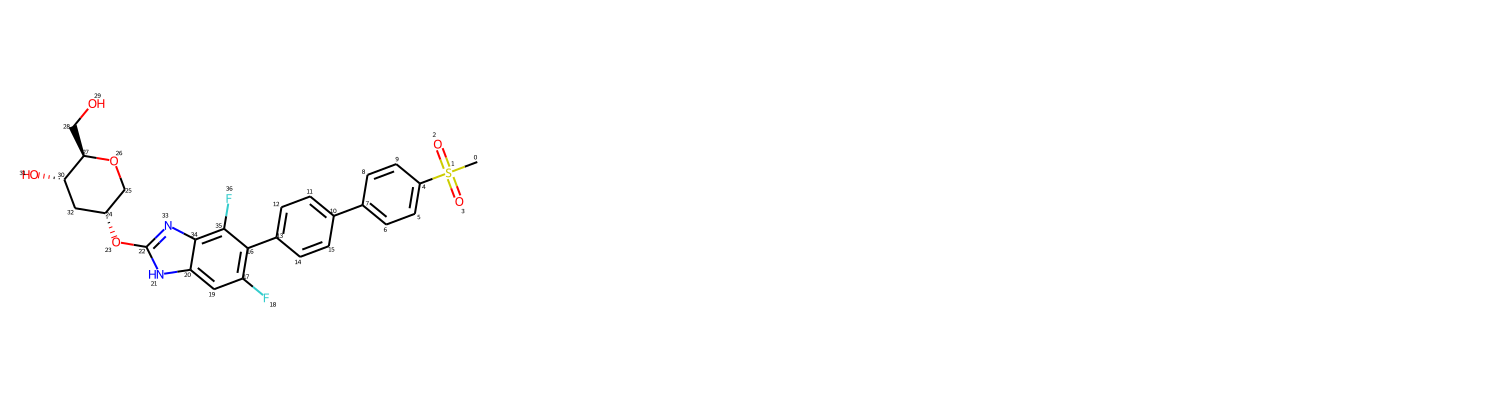

()

In [45]:
from utils.common_utils import get_mol,show_mols,mol_with_atom_index
from utils.sarm_utils import fragmentize,create_SARM,create_SARM_MLP,frag_mol_near_ring
from my_toolset.my_utils import canonic_smiles,df_valid
from rdkit import Chem

def kekulize_smi(smi):
    try:
        mol=get_mol(smi)
        Chem.Kekulize(mol)
        smi=Chem.MolToSmiles(mol, kekuleSmiles=True)
        return smi
    except Exception as e:
        print(e)
        return smi
    
def get_RGrps_dummy(mol,Core_smi):
    mol=get_mol(mol)
    # FragMol=get_mol(Frag_smi)
    CoreMol=Chem.MolFromSmarts(Core_smi)  ### Must be read as SMARTS
    matchedFrag=mol.GetSubstructMatches(CoreMol)[0]  ## Only the first match will be considered!
    print(matchedFrag)
    matchedDummy=CoreMol.GetSubstructMatches(Chem.MolFromSmarts('[*][#0]'))  ##[CoreAtom, DummyAtom]
    if len(matchedDummy)==2:
        if matchedDummy[0][1]>matchedDummy[1][1]:
            matchedDummy=[matchedDummy[1],matchedDummy[0]]
    print(matchedDummy)
    BondList=[]
    AtomPairList=[]
    '''  Put the dummy atoms in order  '''
    
    for imatDummy in matchedDummy:
        bond_coreAtom=matchedFrag[imatDummy[0]]
        bond_RAtom=matchedFrag[imatDummy[1]]
        AtomPairList.append([bond_coreAtom, bond_RAtom])
        bond=mol.GetBondBetweenAtoms(bond_coreAtom, bond_RAtom).GetIdx()
        BondList.append(bond)
    dummyLabels=[(0, 0) for ibond in BondList]    
    FragedMol= Chem.FragmentOnBonds(mol, BondList, dummyLabels=dummyLabels)
    '''  Get the Fragments  '''
    fragSmis=[get_frag(FragedMol, iatomPair[1]) for iatomPair in AtomPairList]
    return fragSmis

def get_frag(fraged_mol, atomIdx):
    Atoms=fraged_mol.GetAtoms()
    count=0
    newAtoms=[Atoms[atomIdx]]
    RAtomIdx=[atomIdx]
    while len(newAtoms) > 0:
        count+=1
        tmpAtoms=[]
        for iAtom in newAtoms:
            negbs=iAtom.GetNeighbors()
            for inegb in negbs:
                inegbIdx=inegb.GetIdx()
                if inegbIdx not in RAtomIdx:
                    RAtomIdx.append(inegbIdx)
                    tmpAtoms.append(inegb)
        newAtoms=tmpAtoms
        if count>100:  ## get avoid of dead circle
            break
        # frag_smi = Chem.MolFragmentToSmiles(mol, RAtomIdx, canonical=True,isomericSmiles=False,kekuleSmiles=True) 
        frag_smi = Chem.MolFragmentToSmiles(fraged_mol, RAtomIdx, canonical=True,isomericSmiles=False) 
    return kekulize_smi(frag_smi)

smi="CS(=O)(=O)c1ccc(cc1)-c1ccc(cc1)-c1c(F)cc2[nH]c(O[C@H]3CO[C@H](CO)[C@@H](O)C3)nc2c1F"
mol=get_mol(smi)
mol=mol_with_atom_index(mol,start=0)
png,svg=show_mols([mol])
# frag_mol_near_ring(smi, pos_args={'RR':True, 'nRnR':False})
display(svg)
# bond=mol.GetBondBetweenAtoms(9,6)
# print(dir(bond))
# print(f"Bond:  {bond.IsInRing()}")
## get fragment

# nm = Chem.FragmentOnBonds(mol,[bond], dummyLabels=[(0, 0)])
# display(nm)
# get_frag(nm,atomIdx=13)
# # png,svg=show_mols([nm])

smarts="*-c1ccc(-c2ccccc2)cc1"
# get_RGrps_dummy(mol,smarts)
smartMol=get_mol(smarts)
# smartMol=Chem.AddHs(smartMol)
# smartSmi=Chem.MolToSmiles(smartMol)
# smartSmi=smartSmi.replace('[H]','[#0]')
# smartMol=Chem.MolFromSmarts(smartSmi)
mol.GetSubstructMatches(smartMol)

In [70]:
import numpy as np
def add_singleBond_dummy(smarts):
    newSmarts=''
    for idx,ilet in enumerate(smarts):
        if idx==0 and ilet=='*':
            newSmarts+='*-'
        elif idx==len(smarts)-1 and ilet=='*':
            newSmarts+='-*'
        elif ilet=='*':
            newSmarts+='-*'
        else:
            newSmarts+=ilet
    return newSmarts

def get_atomRingInfo(smi):
    mol=get_mol(smi)
    rInfo=mol.GetRingInfo()
    atomRingInfo=np.zeros(mol.GetNumAtoms())
    for iring in rInfo.AtomRings():
        iring=list(iring)
        atomRingInfo[iring]+=1
    return atomRingInfo

def match_core(ismi,ismarts):
    # print("ismi",ismi)
    # print("ismarts",ismarts)
    mol = Chem.MolFromSmiles(ismi)
    # ismarts=replace_nH(ismarts)
    smartsMol = Chem.MolFromSmarts(ismarts) #,sanitize=False
    matched=mol.GetSubstructMatches(smartsMol)
    if len(matched)>0:
        smartRI=get_atomRingInfo(ismarts)
        print(f"smartRI= {smartRI}")
        molRI=get_atomRingInfo(mol)
        for imatch in matched:
            submolRI=molRI[list(imatch)]
            print(f"submolRI= {submolRI}")
            diff=(smartRI-submolRI).sum()
            # print(matched)
            if diff==0:
                return 1
        return 0
    else:
        return 0

# add_singleBond_dummy('*C(*)CO*')
# mol=get_mol('*C(*)CO*')
# mol=Chem.AddHs(mol)
# smartMol=Chem.MolFromSmiles("CS(=O)(=O)c1ccc(cc1)-c1ccc(cc1)-c1c(F)cc2[nH]c(O[C@H]3CO[C@H](CO)[C@@H](O)C3)nc2c1F")
# ring_info = smartMol.GetRingInfo()
# dir(ring_info)
# print(ring_info.AtomRings())
# get_atomRingInfo("CS(=O)(=O)c1ccc(cc1)-c1ccc(cc1)-c1c(F)cc2[nH]c(O[C@H]3CO[C@H](CO)[C@@H](O)C3)nc2c1F")
match_core("*C1=CC=C(C2=C(F)C=C3[NH]C=C(C(=O)O)C3=C2F)C=C1",'*c1ccc(-c2ccccc2)cc1')

smartRI= [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
submolRI= [0. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1.]
submolRI= [1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2.]


0

In [1]:
from rdkit import Chem
# Create a SDMolSupplier object for the SDF file
suppl = Chem.SDMolSupplier("/public/home/zhangjie/Projects/autosarm/DualTarget_JAKAMPK/Data/AMPK_Act_Dock/sdfs/ID_0.sdf")
# for mol in suppl:
#     # Do something with the molecule, e.g. print its name and number of atoms
#     if mol is not None:
#         print(f"Molecule name: {mol.GetProp('_Name')}")
#         print(f"Number of atoms: {mol.GetNumAtoms()}")

print(f'Mol number:  {len(suppl)}')
mol=suppl[0]
conf = mol.GetConformer()
print(f"Molecule name: {mol.GetProp('_Name')}")
print(f"Number of atoms: {mol.GetNumAtoms()}")
smartSmi='c1ccccc1'
smartMol=Chem.MolFromSmarts(smartSmi)
matched=mol.GetSubstructMatches(smartMol)
for i in matched[0]:
    ipos=conf.GetAtomPosition(i)
    print(f"x: {ipos.x} y: {ipos.y}  z: {ipos.z}")
print(dir(mol.GetAtoms()[0]))

Mol number:  1
Molecule name: ID_0
Number of atoms: 25
x: 8.0342 y: -17.9209  z: 20.6485
x: 6.6657 y: -18.0239  z: 20.4091
x: 6.052 y: -19.2357  z: 20.7006
x: 6.7601 y: -20.3386  z: 21.2014
x: 8.1384 y: -20.2115  z: 21.4631
x: 8.8055 y: -18.9881  z: 21.2086
['ClearProp', 'DescribeQuery', 'GetAtomMapNum', 'GetAtomicNum', 'GetBonds', 'GetBoolProp', 'GetChiralTag', 'GetDegree', 'GetDoubleProp', 'GetExplicitBitVectProp', 'GetExplicitValence', 'GetFormalCharge', 'GetHybridization', 'GetIdx', 'GetImplicitValence', 'GetIntProp', 'GetIsAromatic', 'GetIsotope', 'GetMass', 'GetMonomerInfo', 'GetNeighbors', 'GetNoImplicit', 'GetNumExplicitHs', 'GetNumImplicitHs', 'GetNumRadicalElectrons', 'GetOwningMol', 'GetPDBResidueInfo', 'GetProp', 'GetPropNames', 'GetPropsAsDict', 'GetSmarts', 'GetSymbol', 'GetTotalDegree', 'GetTotalNumHs', 'GetTotalValence', 'GetUnsignedProp', 'HasOwningMol', 'HasProp', 'HasQuery', 'InvertChirality', 'IsInRing', 'IsInRingSize', 'Match', 'NeedsUpdatePropertyCache', 'SetAtomM

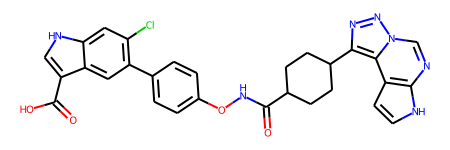

O=C(O)c1c[nH]c2cc(Cl)c(-c3ccc(ONC(=O)C4CCC(c5nnn6cnc7[nH]ccc7c56)CC4)cc3)cc12


In [11]:
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize 
un = rdMolStandardize.Uncharger() 
mol=Chem.MolFromSmiles("O=C([O-])c1c[nH]c2cc(Cl)c(-c3ccc(ONC(=O)C4CCC(c5nnn6cnc7[nH]ccc7c56)CC4)cc3)cc12")
# Chem.rdmolops.SanitizeMol(mol,sanitizeOps=Chem.rdmolops.SanitizeFlags.SANITIZE_ALL)
mol=un.uncharge(mol) 
display(mol)
print(Chem.MolToSmiles(mol)) 

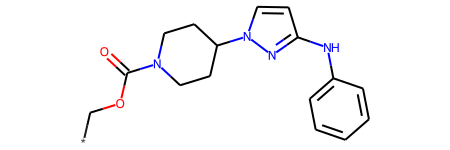

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x00\xc8\x08\x02\x00\x00\x00Iw \xb5\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00 \x00IDATx\x9c\xed\xddw\\\xd3\xd7\xfe?\xf0W\x12\xa6 \xc8R\xc2R\xc4\t\xe2\xc2\r\xa2\x08\x8a#8\xaa\xd4u\xb1\x8e\xd6~\xb5\x16\xbd\xd6\x96\xde\xfe\xdaFo\xfbh\xf1\xf6\xda\x8b\xde\xda{\xb9v\x88\x83**\nX\x07\xb8\x10\x10,\x88\xa2\x08.\x10\'"{\x86\x91\xe4\xfc\xfe\xf8\xd0\x18\xd9B\x92O\x12\xce\xf3/\xfa\xc9\'\xe7\xbcS\xe1\x9ds\xce\xe7\x0c\x0e!\x04\x14EQ\x9a\x80\xcbv\x00\x14EQ\x1dE\x13\x16EQ\x1a\x83&,\x8a\xa24\x06MX\x14Ei\x0c\x9a\xb0(\x8a\xd2\x184aQ\x14\xa51t\xd8\x0e\x80\xa2\x14\xa0\xbe\xbe\xfe\xde\xbd{+W\xae\x04\xa0\xaf\xaf\xdf\xa3G\x0f\xe6\xba\xb1\xb1\xb1\xae\xae.\xf3\xb3\x99\x99\x19\xf3\x83\xae\xae\xae\xb1\xb11\xf3s\x8f\x1e=\xf4\xf5\xf5\x99\x9fMMM\xb9\\.\x00\x1e\x8fgbb\xc2\\400044d~\xee\xd9\xb3\xa7\x8e\x8e\x0e\x00\x0e\x87\xd3\xabW/++\xab\x9e={*\xff\xc3Q\xaf\xd0\x84Ei\x83\xf0\xf0\xf0-[\xb6\x14\x17\x17\xab\xb2\xd2m\xdb\xb6-^\xbcx\xf0\x

In [5]:
'''  Import and common functions  '''
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem,Draw
from rdkit.Chem import MCS
import rdkit
rdkit.RDLogger.DisableLog('rdApp.*')
import pandas as pd
import numpy as np
import copy,re
from rdkit.Chem.Scaffolds.MurckoScaffold import GetScaffoldForMol,MakeScaffoldGeneric,MurckoScaffoldSmiles,MurckoScaffoldSmilesFromSmiles
from my_toolset.my_utils import get_mol,compute_FP,canonic_smiles,mapper,weight
from my_toolset.drawing_utils import show_mols
import os,sys
from utils.common_utils import mapper,csvToExcel,get_mol,compute_FP,canonic_smiles,float_row,heavy_atm_smiles,kekulize_smi,sort_mol_sim_df
from rdkit.Chem.Draw import MolDraw2DCairo

# def compute_sim(smi1, ref_smi="c1(ccc(cc1)c1c(cc2c(c1)c(c[nH]2)C(=O)O)Cl)c1cccc2n1nc(NC(=O)C1CC1)n2"):
#     mol1 = get_mol(smi1)
#     # display(mol1)
#     FP1 = AllChem.GetMorganFingerprintAsBitVect(mol1, 2, nBits=1024)
#     mol2 = get_mol(ref_smi)
#     # display(mol2)
#     FP2 = AllChem.GetMorganFingerprintAsBitVect(mol2, 2, nBits=1024)
#     molSim = DataStructs.TanimotoSimilarity(
#                 FP1, FP2) 
#     smi1=Chem.MolToSmiles(mol1)
#     return [smi1, molSim]

# sim1=compute_sim(smi1="O=C(O)c1c[nH]c2cc(Cl)c(-c3ccc(ONC(=O)C4CCC(c5nnn6cnc7[nH]ccc7c56)CC4)cc3)cc12")
# print(sim1)
# sim2=compute_sim(smi1="O=C([O-])c1c[nH]c2cc(Cl)c(-c3ccc(NC(=O)C4CCC(c5nnn6cnc7[nH]ccc7c56)CC4)cc3)cc12")
# print(sim2)
# # mol=Chem.MolFromSmiles("c1nc(c2c(n1)[nH]cc2)N(C)C1CN(c2ccc(c3cc4c(c[nH]c4cc3Cl)C(=O)NS(=O)(=O)C)cc2)CC1")
mol=get_mol("*COC(=O)N1CCC(n2ccc(Nc3ccccc3)n2)CC1")
display(mol)
drawer = MolDraw2DCairo(400, 200)
drawer.drawOptions().legendFontSize = 40
drawer.DrawMolecule(mol,legend='tets')
drawer.FinishDrawing()
img = drawer.GetDrawingText()
display(img)

C 1198.0
N 306.0
O 269.0
Other 326.0
 PyMOL not running, entering library mode (experimental)


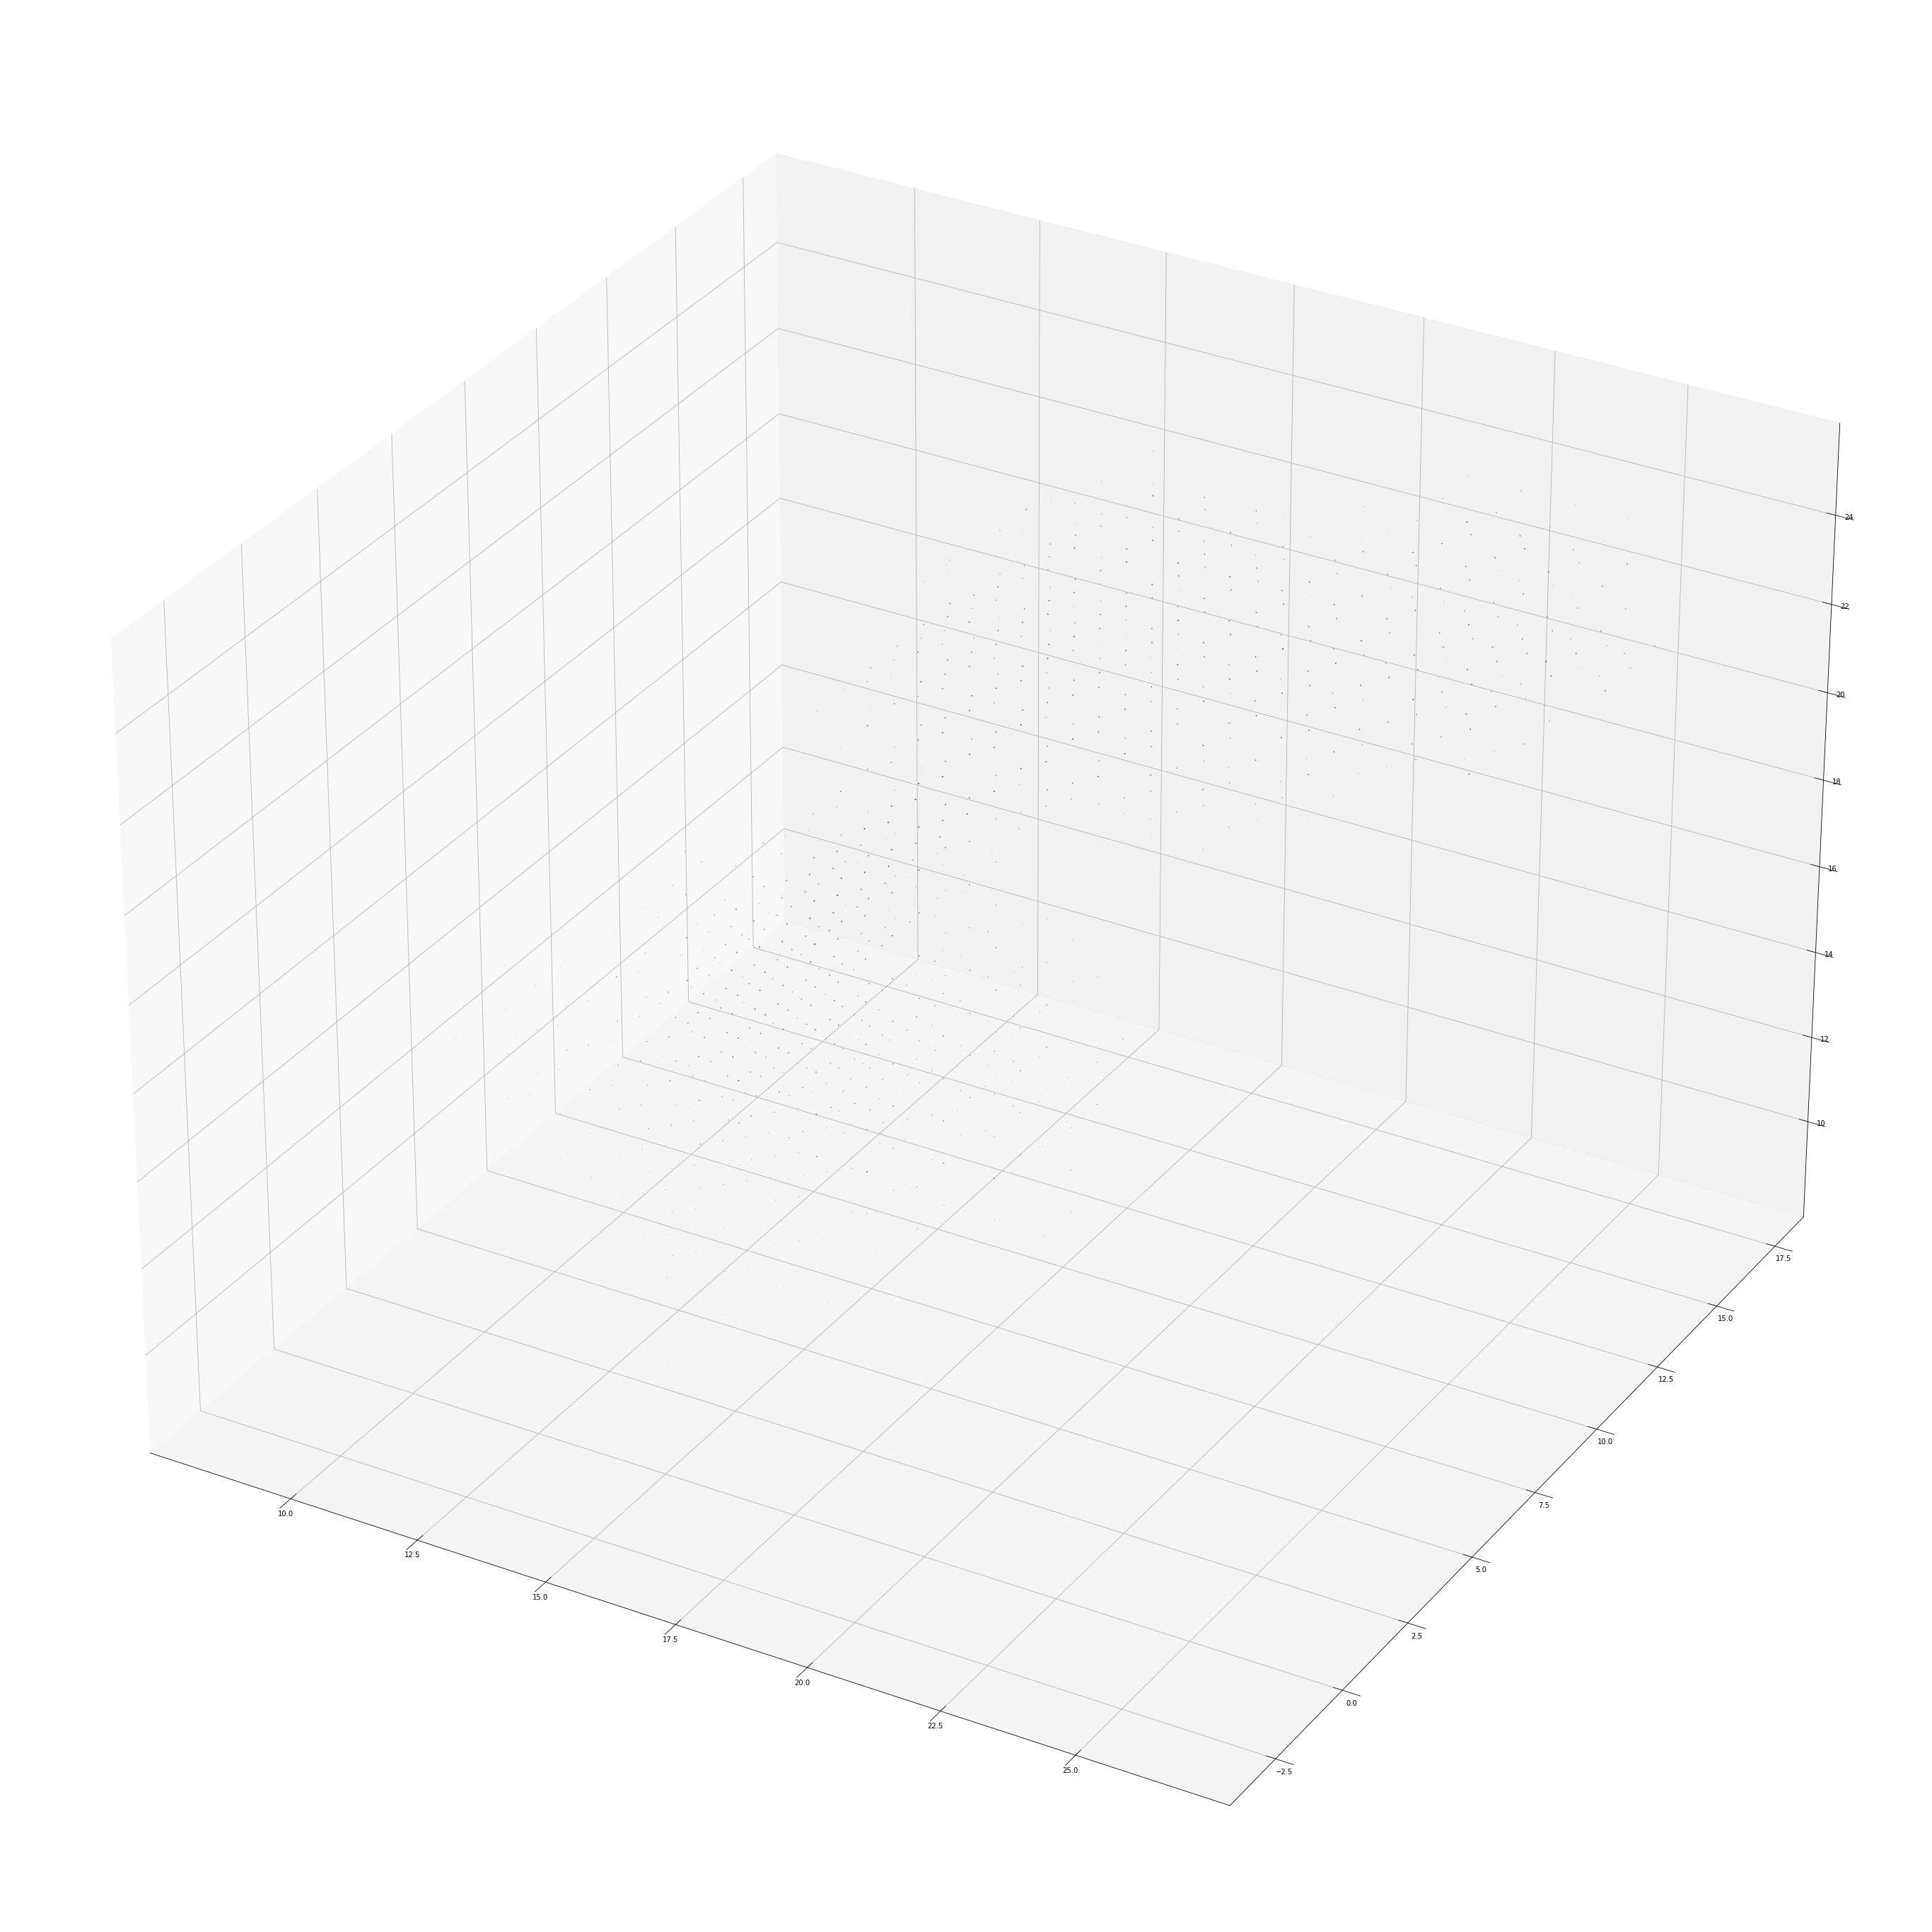

In [1]:
###  Plot for Doctor Chen
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

target="rorgt"

pymolPse=1
dhodh_dict=f"/public/home/zhangjie/Projects/autosarm/Temp/grid_{target}.pkl"
work_dir="/public/home/zhangjie/Projects/autosarm/Temp"

# dhodh_dict="/public/home/zhangjie/Projects/autosarm/Temp/grid_rorgt.pkl"
with open(dhodh_dict,'rb') as f:
    grid=pickle.load(f)
# print(dhodh_dict.keys())
# print(dhodh_dict['O'][900])
color={'C':'grey','N':'blue','O':'red','Other':'green'}
fig=plt.figure(figsize=(50,50))
ax=fig.add_subplot(111,projection='3d')
size_list_all={}
for type in color:
    max_count=np.max(grid[type])
    print(type,max_count)
    x_list=[]
    y_list=[]
    z_list=[]
    size_list=[]
    for x in range(math.ceil(grid['max_x']-grid['min_x'])):
        for y in range(math.ceil(grid['max_y']-grid['min_y'])):
            for z in range(math.ceil(grid['max_z']-grid['min_z'])):
                x_list.append(grid['min_x']+x)
                y_list.append(grid['min_y']+y)
                z_list.append(grid['min_z']+z)
                size_list.append(grid[type][x,y,z]/max_count)
    size_list_all[type]=size_list
    
    im=ax.scatter(x_list,y_list,z_list,s=size_list,color=color[type])
fig.show()
ActAtomPos_list=zip(x_list,y_list,z_list)
df_ActAtomPos=pd.DataFrame(ActAtomPos_list, columns=['X','Y','Z'])
for idx,type in enumerate(color):
    df_ActAtomPos[type]=size_list_all[type]

if pymolPse==1:
    from importlib import reload
    import pymol
    import pandas as pd
    from pymol import cmd, stored
    reload(pymol)
    
    # pymol.finish_launching() 
    # pl = pymol2.PyMOL()
    # pl.start()
    # cmd=pl.cmd
    
    
    # df_ActAtomPos=pd.read_csv(f"{work_dir}/JAK_actSet_atomPos_gridCount.csv")
    # countCols=['Count_All','Count_Carbon','Count_ac','Count_C','Count_Nitrogen','Count_an','Count_N','Count_Oxygen','Count_ao','Count_O']
    
    # countColMax=df_ActAtomPos[countCols].max().max()
    # for icountCol in countCols:
    #     # countColMax=df_ActAtomPos[icountCol].max()
    #     df_ActAtomPos[icountCol]=df_ActAtomPos[icountCol]/countColMax
        
    greyColors=['tin','black','zinc','Grey50']
    orangeColors=['lightorange','brightorange','olive','deepolive','orange']
    blueColors=['lightblue','slate','tv_blue','skyblue','blue']
    redColors=['salmon','deepsalmon','tv_red','raspberry','red']
    # pymol.finish_launching()
    for idx,irow in df_ActAtomPos.iterrows():
        iX=irow['X']
        iY=irow['Y']
        iZ=irow['Z']
        
        if irow['Other']>0:
            objName="Other_Site"
            cmd.pseudoatom(objName, name=f"DUM{idx}", pos=[iX, iY, iZ], vdw=irow['Other'], color="gray80", label="")
            cmd.show("spheres", objName)
            cmd.color("gray80", objName)
        
        for idxCol,icol in enumerate(['C']):
            if irow[icol]>0:
                objName=f"{icol}_Site"
                cmd.pseudoatom(objName, name=f"DUM{idx}", pos=[iX, iY, iZ], vdw=irow[icol], color="", label="")
                cmd.show("spheres", objName)
                cmd.color(greyColors[-idxCol-1], objName)
        for idxCol,icol in enumerate(['N']):
            if irow[icol]>0:
                objName=f"{icol}_Site"
                cmd.pseudoatom(objName, name=f"DUM{idx}", pos=[iX, iY, iZ], vdw=irow[icol], color="", label="")
                cmd.show("spheres", objName)
                cmd.color(blueColors[-idxCol-1], objName)
        for idxCol,icol in enumerate(['O']):
            if irow[icol]>0:
                objName=f"{icol}_Site"
                cmd.pseudoatom(objName, name=f"DUM{idx}", pos=[iX, iY, iZ], vdw=irow[icol], color="", label="")
                cmd.show("spheres", objName)
                cmd.color(redColors[-idxCol-1], objName)
    cmd.bg_color("white")            
    cmd.set("sphere_transparency", 0.3, "all")        
    cmd.center("C_Site")
    cmd.save(f"{work_dir}/{target}_dummy.pse")
    pymol.finish_launching()

In [3]:
import pandas as pd

# line_list=[]
# length=0
# with open("/public/home/zhangjie/Projects/autosarm/DualTarget_JAKAMPK/Data/BindingDB/BindingDB_All.tsv", "r") as f:
#     for line in f:
#         line=line.replace(',','_')
#         line_sp=line.split('\t')
#         if length<2:
#             length=len(line_sp)
#         if len(line_sp)==length:
#             line_list.append(line_sp)
#         else:
#             print(line)

# df=pd.read_csv("/public/home/zhangjie/Projects/autosarm/DualTarget_JAKAMPK/Data/BindingDB/BindingDB_All.tsv",sep='\t',error_bad_lines=False)
# print(f"Total lines: {len(df)}")

df.to_csv("/public/home/zhangjie/Projects/autosarm/DualTarget_JAKAMPK/Data/BindingDB/BindingDB_All.csv",index=None)

# df=pd.read_table("/public/home/zhangjie/Projects/autosarm/DualTarget_JAKAMPK/Data/BindingDB/BindingDB_All.tsv",sep='/t')

In [4]:
from rdkit import Chem, DataStructs
from utils.common_utils import get_mol,show_mols,mol_with_atom_index
from rdkit.Chem import AllChem,Draw,rdFMCS
from IPython.display import display
import pandas as pd
import openpyxl
from openpyxl.drawing.image import Image 
from openpyxl.drawing.spreadsheet_drawing import AnchorMarker
from pathlib import Path
import os,sys

df=pd.read_csv("/public/home/zhangjie/Projects/autosarm/PyQT/GenCPDs/GenCPDs_WtLt600_pains_Info.csv")
df_AMPK=df[['AMPK_Frag','AMPK_mean','AMPK_std','AMPK_median']]
df_AMPK=df_AMPK.drop_duplicates(subset='AMPK_Frag')
df_AMPK.sort_values(by='AMPK_mean', inplace=True)
df_AMPK.to_csv("/public/home/zhangjie/Projects/autosarm/PyQT/FragmentsRList/AMPK_Motif.csv", index=None)


df_JAK=df[['JAK_Frag','JAK_mean','JAK_std','JAK_median']]
df_JAK=df_JAK.drop_duplicates(subset='JAK_Frag')
df_JAK.sort_values(by='JAK_mean', inplace=True)
df_JAK.to_csv("/public/home/zhangjie/Projects/autosarm/PyQT/FragmentsRList/JAK_Motif.csv", index=None)



In [41]:
from rdkit import Chem, DataStructs
from utils.common_utils import get_mol,show_mols,mol_with_atom_index
from rdkit.Chem import AllChem,Draw,rdFMCS
from IPython.display import display
import pandas as pd
import numpy as np
import openpyxl
from openpyxl.drawing.image import Image 
from openpyxl.drawing.spreadsheet_drawing import AnchorMarker
from pathlib import Path
from functools import partial
from pandarallel import pandarallel
pandarallel.initialize(nb_workers=40)
import os,sys

def replace_nH(ismarts):
    ismarts=ismarts.replace('[nH]','n')
    ismarts=ismarts.replace('-','')
    return ismarts

def match_frag(ismi,ismarts):
    # print("ismi",ismi)
    # print("ismarts",ismarts)
    mol = Chem.MolFromSmiles(ismi)
    ismarts=replace_nH(ismarts)
    smartsMol = Chem.MolFromSmarts(ismarts) #,sanitize=False
    matched=mol.GetSubstructMatches(smartsMol)
    if len(matched)>0:
        # print(matched)
        return 1
    else:
        return 0

def get_activity_info(frag, file_act, cols):
    df_act=pd.read_csv(file_act)
    df_act=df_act.dropna(subset=cols)
    df_act[cols[0]]=9-df_act[cols[0]].apply(np.log10)
    df_act['matched']=df_act.apply(lambda x: match_frag(x['Cano_SMILES'],ismarts=frag),axis=1)
    df_match=df_act[df_act['matched']==1]
    # print(df_match)
    if len(df_match)==0:
        return ['', '', '',0] #for icol in cols]
    if len(df_match)==1:
        means=df_match.iloc[0]
        stds={}# df_match.iloc[0]
        medians={}# df_match.iloc[0]
        for icol in cols:
            stds[icol]=''
            medians[icol]=''
    if len(df_match)>1:
        means=df_match.mean().round(2)
        stds=df_match.std().round(2)
        medians=df_match.median().round(2)
    res=[]
    for icol in cols:
        res=[means[icol],stds[icol],medians[icol],len(df_match)] 
    return res



AMPK_ActFile="/public/home/zhangjie/Projects/autosarm/AutoSARM_QT/Active_DataSet/Active_cpds_PRKAB1_cano_doi.csv"
df=pd.read_csv('/public/home/zhangjie/Projects/autosarm/PyQT/FragmentsRList/AMPK_Motif.csv')
# df['Cano_SMILES']=df['SMILES'].apply(canonic_smiles)

infoCols=["EC50nM"] 
get_activity_info_p=partial(get_activity_info, file_act=AMPK_ActFile, cols=infoCols)
actInfo=df['AMPK_Frag'].parallel_apply(get_activity_info_p) #
actInfoNew=[]
for iInfo in actInfo.to_list():
    print(iInfo)
    actInfoNew.append(list(iInfo))
actCols=[]
icol="pEC50"
actCols=[f'{icol}_mean',f'{icol}_std',f'{icol}_median',"Count"]
dfInfo=pd.DataFrame(actInfoNew, columns=actCols)
df[actCols]=actInfoNew
df=df[df[f'{icol}_mean']!=""]
df=df.sort_values(by=f'{icol}_mean',ascending=False)
df.to_csv('/public/home/zhangjie/Projects/autosarm/PyQT/FragmentsRList/AMPK_Motif_pEC50.csv', index=None)



JAK_ActFile="/public/home/zhangjie/Projects/autosarm/AutoSARM_QT/Active_DataSet/JAK_All_Mar22_PK_doi.csv"
df=pd.read_csv('/public/home/zhangjie/Projects/autosarm/PyQT/FragmentsRList/JAK_Motif.csv')
# df['Cano_SMILES']=df['SMILES'].apply(canonic_smiles)

infoCols=["JAK1"] 
get_activity_info_p=partial(get_activity_info, file_act=JAK_ActFile, cols=infoCols)
actInfo=df['JAK_Frag'].parallel_apply(get_activity_info_p) #
actInfoNew=[]
for iInfo in actInfo.to_list():
    # print(iInfo)
    actInfoNew.append(list(iInfo))
actCols=[]
icol="pIC50"
actCols=[f'{icol}_mean',f'{icol}_std',f'{icol}_median',"Count"]
dfInfo=pd.DataFrame(actInfoNew, columns=actCols)
df[actCols]=actInfoNew
df=df[df[f'{icol}_mean']!=""]
df=df.sort_values(by=f'{icol}_mean',ascending=False)
df.to_csv('/public/home/zhangjie/Projects/autosarm/PyQT/FragmentsRList/JAK_Motif_pIC50.csv', index=None)



INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


/public/home/zhangjie/anaconda3/envs/reinvent1/lib/python3.7/site-packages/ipykernel_launcher.py:51: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/public/home/zhangjie/anaconda3/envs/reinvent1/lib/python3.7/site-packages/ipykernel_launcher.py:52: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/public/home/zhangjie/anaconda3/envs/reinvent1/lib/python3.7/site-packages/ipykernel_launcher.py:53: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/public/home/zhangjie/anaconda3/envs/reinvent1/lib/pyth

['', '', '', 0]
['', '', '', 0]
['', '', '', 0]
['', '', '', 0]
[8.045757490560675, '', '', 1]
['', '', '', 0]
['', '', '', 0]
['', '', '', 0]
['', '', '', 0]
['', '', '', 0]
['', '', '', 0]
['', '', '', 0]
['', '', '', 0]
['', '', '', 0]
['', '', '', 0]
['', '', '', 0]
['', '', '', 0]
['', '', '', 0]
['', '', '', 0]
[8.397940008672037, '', '', 1]
['', '', '', 0]
['', '', '', 0]
['', '', '', 0]
['', '', '', 0]
['', '', '', 0]
['', '', '', 0]
['', '', '', 0]
[8.397940008672037, '', '', 1]
['', '', '', 0]
['', '', '', 0]
['', '', '', 0]
['', '', '', 0]
['', '', '', 0]
['', '', '', 0]
['', '', '', 0]
['', '', '', 0]
['', '', '', 0]
['', '', '', 0]
['', '', '', 0]
['', '', '', 0]
['', '', '', 0]
['', '', '', 0]
['', '', '', 0]
['', '', '', 0]
['', '', '', 0]
['', '', '', 0]
['', '', '', 0]
['', '', '', 0]
[8.045757490560675, '', '', 1]
[8.698970004336019, '', '', 1]
[8.698970004336019, '', '', 1]
[8.698970004336019, '', '', 1]
[8.698970004336019, '', '', 1]
[8.698970004336019, '', '', 1]
[

/public/home/zhangjie/anaconda3/envs/reinvent1/lib/python3.7/site-packages/ipykernel_launcher.py:51: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/public/home/zhangjie/anaconda3/envs/reinvent1/lib/python3.7/site-packages/ipykernel_launcher.py:52: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/public/home/zhangjie/anaconda3/envs/reinvent1/lib/python3.7/site-packages/ipykernel_launcher.py:53: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/public/home/zhangjie/anaconda3/envs/reinvent1/lib/pyth